In [1]:
#important libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler

In [2]:
df =pd.read_excel(r"D:\Work\python\RFM ANALYSIS\online_retail_II.xlsx", sheet_name =0)
df.head(10)

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom
5,489434,22064,PINK DOUGHNUT TRINKET POT,24,2009-12-01 07:45:00,1.65,13085.0,United Kingdom
6,489434,21871,SAVE THE PLANET MUG,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom
7,489434,21523,FANCY FONT HOME SWEET HOME DOORMAT,10,2009-12-01 07:45:00,5.95,13085.0,United Kingdom
8,489435,22350,CAT BOWL,12,2009-12-01 07:46:00,2.55,13085.0,United Kingdom
9,489435,22349,"DOG BOWL , CHASING BALL DESIGN",12,2009-12-01 07:46:00,3.75,13085.0,United Kingdom


In [3]:
#overview the data
df.info() #noticing missing in customer ID

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 525461 entries, 0 to 525460
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   Invoice      525461 non-null  object        
 1   StockCode    525461 non-null  object        
 2   Description  522533 non-null  object        
 3   Quantity     525461 non-null  int64         
 4   InvoiceDate  525461 non-null  datetime64[ns]
 5   Price        525461 non-null  float64       
 6   Customer ID  417534 non-null  float64       
 7   Country      525461 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 32.1+ MB


In [4]:
df.describe() #noticing negative values in quantity and price which is not making sense

,Quantity,InvoiceDate,Price,Customer ID
count,525461.000000,525461,525461.000000,417534.000000
mean,10.337667,2010-06-28 11:37:36.845017856,4.688834,15360.645478
min,-9600.000000,2009-12-01 07:45:00,-53594.360000,12346.000000
25%,1.000000,2010-03-21 12:20:00,1.250000,13983.000000
50%,3.000000,2010-07-06 09:51:00,2.100000,15311.000000
75%,10.000000,2010-10-15 12:45:00,4.210000,16799.000000
max,19152.000000,2010-12-09 20:01:00,25111.090000,18287.000000
std,107.424110,NaN,146.126914,1680.811316


In [5]:
df.describe(include ="O")

,Invoice,StockCode,Description,Country
count,525461,525461,522533,525461
unique,28816,4632,4681,40
top,537434,85123A,WHITE HANGING HEART T-LIGHT HOLDER,United Kingdom
freq,675,3516,3549,485852


In [6]:
#handling missing in customer ID
#EDA
df[df['Customer ID'].isna()].head(10)

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
263,489464,21733,85123a mixed,-96,2009-12-01 10:52:00,0.00,NaN,United Kingdom
283,489463,71477,short,-240,2009-12-01 10:52:00,0.00,NaN,United Kingdom
284,489467,85123A,21733 mixed,-192,2009-12-01 10:53:00,0.00,NaN,United Kingdom
470,489521,21646,NaN,-50,2009-12-01 11:44:00,0.00,NaN,United Kingdom
577,489525,85226C,BLUE PULL BACK RACING CAR,1,2009-12-01 11:49:00,0.55,NaN,United Kingdom
578,489525,85227,SET/6 3D KIT CARDS FOR KIDS,1,2009-12-01 11:49:00,0.85,NaN,United Kingdom
1055,489548,22271,FELTCRAFT DOLL ROSIE,1,2009-12-01 12:32:00,2.95,NaN,United Kingdom
1056,489548,22254,FELT TOADSTOOL LARGE,12,2009-12-01 12:32:00,1.25,NaN,United Kingdom
1057,489548,22273,FELTCRAFT DOLL MOLLY,3,2009-12-01 12:32:00,2.95,NaN,United Kingdom
1058,489548,22195,LARGE HEART MEASURING SPOONS,1,2009-12-01 12:32:00,1.65,NaN,United Kingdom


In [7]:
df[df['Quantity']<0].head(20)

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
178,C489449,22087,PAPER BUNTING WHITE LACE,-12,2009-12-01 10:33:00,2.95,16321.0,Australia
179,C489449,85206A,CREAM FELT EASTER EGG BASKET,-6,2009-12-01 10:33:00,1.65,16321.0,Australia
180,C489449,21895,POTTING SHED SOW 'N' GROW SET,-4,2009-12-01 10:33:00,4.25,16321.0,Australia
181,C489449,21896,POTTING SHED TWINE,-6,2009-12-01 10:33:00,2.10,16321.0,Australia
182,C489449,22083,PAPER CHAIN KIT RETRO SPOT,-12,2009-12-01 10:33:00,2.95,16321.0,Australia
183,C489449,21871,SAVE THE PLANET MUG,-12,2009-12-01 10:33:00,1.25,16321.0,Australia
184,C489449,84946,ANTIQUE SILVER TEA GLASS ETCHED,-12,2009-12-01 10:33:00,1.25,16321.0,Australia
185,C489449,84970S,HANGING HEART ZINC T-LIGHT HOLDER,-24,2009-12-01 10:33:00,0.85,16321.0,Australia
186,C489449,22090,PAPER BUNTING RETRO SPOTS,-12,2009-12-01 10:33:00,2.95,16321.0,Australia
196,C489459,90200A,PURPLE SWEETHEART BRACELET,-3,2009-12-01 10:44:00,4.25,17592.0,United Kingdom


In [8]:
(df['Quantity']<0).sum() #12326 cases with negative values in Quantity variable

12326

In [9]:
df['Invoice'].str.startswith('C').sum() #10206 cancellation cases

10206

In [10]:
df['Invoice'] = df['Invoice'].astype(str).str.strip()
matches = df['Invoice'].str.match('^\\d{6}$').sum()
print(matches)            #515252 cases is about 6 digits #10206 cases start with C #then 3 cases where??




515252


In [11]:
#i wanna see if there's another cases start with any letter than C 
df['Invoice'].str.replace("[0-9]","", regex=True).unique()

array(['', 'C', 'A'], dtype=object)

In [12]:
df[df['Invoice'].str.startswith('A')] #3 cases as we expected

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
179403,A506401,B,Adjust bad debt,1,2010-04-29 13:36:00,-53594.36,NaN,United Kingdom
276274,A516228,B,Adjust bad debt,1,2010-07-19 11:24:00,-44031.79,NaN,United Kingdom
403472,A528059,B,Adjust bad debt,1,2010-10-20 12:04:00,-38925.87,NaN,United Kingdom


In [13]:
#check rules attached to StockCode [5 digits ]
df['StockCode'] = df['StockCode'].astype(str).str.strip()
matches = df['StockCode'].str.match('^\\d{5}$').sum()
print(matches)

445349


In [14]:
df[df['StockCode'].str.match('^\\d{5}$') == False]

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
12,489436,48173C,DOOR MAT BLACK FLOCK,10,2009-12-01 09:06:00,5.95,13078.0,United Kingdom
23,489436,35004B,SET OF 3 BLACK FLYING DUCKS,12,2009-12-01 09:06:00,4.65,13078.0,United Kingdom
28,489436,84596F,SMALL MARSHMALLOWS PINK BOWL,8,2009-12-01 09:06:00,1.25,13078.0,United Kingdom
...,...,...,...,...,...,...,...,...
525387,538170,84029E,RED WOOLLY HOTTIE WHITE HEART.,2,2010-12-09 19:32:00,3.75,13969.0,United Kingdom
525388,538170,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,2,2010-12-09 19:32:00,3.75,13969.0,United Kingdom
525389,538170,85232B,SET OF 3 BABUSHKA STACKING TINS,2,2010-12-09 19:32:00,4.95,13969.0,United Kingdom
525435,538171,47591D,PINK FAIRY CAKE CHILDRENS APRON,1,2010-12-09 20:01:00,1.95,17530.0,United Kingdom


In [15]:
#if i'm okay with letters in the end of the number
df[(df['StockCode'].str.match('^\\d{5}$') == False)&(df['StockCode'].str.match('^\\d{5}[a-zA-Z]+$')==False) ]

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
89,489439,POST,POSTAGE,3,2009-12-01 09:28:00,18.00,12682.0,France
126,489444,POST,POSTAGE,1,2009-12-01 09:55:00,141.00,12636.0,USA
173,489447,POST,POSTAGE,1,2009-12-01 10:10:00,130.00,12362.0,Belgium
625,489526,POST,POSTAGE,6,2009-12-01 11:50:00,18.00,12533.0,Germany
735,C489535,D,Discount,-1,2009-12-01 12:11:00,9.00,15299.0,United Kingdom
...,...,...,...,...,...,...,...,...
524776,538147,M,Manual,1,2010-12-09 16:11:00,15.00,13090.0,United Kingdom
524887,538148,DOT,DOTCOM POSTAGE,1,2010-12-09 16:26:00,547.32,NaN,United Kingdom
525000,538149,DOT,DOTCOM POSTAGE,1,2010-12-09 16:27:00,620.68,NaN,United Kingdom
525126,538153,DOT,DOTCOM POSTAGE,1,2010-12-09 16:31:00,822.94,NaN,United Kingdom


In [16]:
#look to country & quantity& description

In [17]:
#Data Cleaning
#1- dealing with Invoice variable
cleaned_df =df.copy()
mask =( cleaned_df['Invoice'].str.match('^\\d{6}$') == True )
cleaned_df = cleaned_df[mask]
cleaned_df

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom
...,...,...,...,...,...,...,...,...
525456,538171,22271,FELTCRAFT DOLL ROSIE,2,2010-12-09 20:01:00,2.95,17530.0,United Kingdom
525457,538171,22750,FELTCRAFT PRINCESS LOLA DOLL,1,2010-12-09 20:01:00,3.75,17530.0,United Kingdom
525458,538171,22751,FELTCRAFT PRINCESS OLIVIA DOLL,1,2010-12-09 20:01:00,3.75,17530.0,United Kingdom
525459,538171,20970,PINK FLORAL FELTCRAFT SHOULDER BAG,2,2010-12-09 20:01:00,3.75,17530.0,United Kingdom


In [18]:
#2- dealing with stockcode
mask =(
    ( cleaned_df['StockCode'].str.match('^\\d{5}$') == True )|
    (cleaned_df['StockCode'].str.match('^\\d{5}[a-zA-Z]+$')== True) |
    (cleaned_df['StockCode'].str.match('^PADS$')== True)
    )
cleaned_df = cleaned_df[mask]
cleaned_df



,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom
...,...,...,...,...,...,...,...,...
525456,538171,22271,FELTCRAFT DOLL ROSIE,2,2010-12-09 20:01:00,2.95,17530.0,United Kingdom
525457,538171,22750,FELTCRAFT PRINCESS LOLA DOLL,1,2010-12-09 20:01:00,3.75,17530.0,United Kingdom
525458,538171,22751,FELTCRAFT PRINCESS OLIVIA DOLL,1,2010-12-09 20:01:00,3.75,17530.0,United Kingdom
525459,538171,20970,PINK FLORAL FELTCRAFT SHOULDER BAG,2,2010-12-09 20:01:00,3.75,17530.0,United Kingdom


In [19]:
#check for cleaning variable Invoice, StockCode
matches = cleaned_df['Invoice'].str.match('^\\d{6}$').sum()
matches_2 = cleaned_df['StockCode'].str.match('^\\d{5}$').sum()
matches_3 = cleaned_df['StockCode'].str.match('^\\d{5}[a-zA-Z]+$').sum()
matches_4 = cleaned_df['StockCode'].str.match('^PADS$').sum()

print (matches)
print(matches_2)
print (matches_3)
print (matches_4)

512797
437330
75453
14


In [20]:
#check for positive and negative values
cleaned_df.describe()

,Quantity,InvoiceDate,Price,Customer ID
count,512797.000000,512797,512797.000000,406337.000000
mean,11.001260,2010-06-28 18:26:53.830657792,3.391472,15373.632992
min,-9600.000000,2009-12-01 07:45:00,0.000000,12346.000000
25%,1.000000,2010-03-21 13:27:00,1.250000,14004.000000
50%,3.000000,2010-07-06 14:25:00,2.100000,15326.000000
75%,10.000000,2010-10-15 14:50:00,4.210000,16814.000000
max,19152.000000,2010-12-09 20:01:00,1157.150000,18287.000000
std,104.352332,NaN,5.067891,1677.365907


In [21]:
#drop missing values in customer ID
cleaned_df.dropna(subset ="Customer ID", inplace =True)
cleaned_df


C:\Users\nermeen.ashraf\AppData\Local\Temp\ipykernel_29248\598816378.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleaned_df.dropna(subset ="Customer ID", inplace =True)


,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom
...,...,...,...,...,...,...,...,...
525456,538171,22271,FELTCRAFT DOLL ROSIE,2,2010-12-09 20:01:00,2.95,17530.0,United Kingdom
525457,538171,22750,FELTCRAFT PRINCESS LOLA DOLL,1,2010-12-09 20:01:00,3.75,17530.0,United Kingdom
525458,538171,22751,FELTCRAFT PRINCESS OLIVIA DOLL,1,2010-12-09 20:01:00,3.75,17530.0,United Kingdom
525459,538171,20970,PINK FLORAL FELTCRAFT SHOULDER BAG,2,2010-12-09 20:01:00,3.75,17530.0,United Kingdom


In [22]:
cleaned_df.describe()

,Quantity,InvoiceDate,Price,Customer ID
count,406337.000000,406337,406337.000000,406337.000000
mean,13.619099,2010-07-01 10:11:06.543288320,2.991462,15373.632992
min,1.000000,2009-12-01 07:45:00,0.000000,12346.000000
25%,2.000000,2010-03-26 14:01:00,1.250000,14004.000000
50%,5.000000,2010-07-09 15:48:00,1.950000,15326.000000
75%,12.000000,2010-10-14 17:09:00,3.750000,16814.000000
max,19152.000000,2010-12-09 20:01:00,295.000000,18287.000000
std,97.000659,NaN,4.285876,1677.365907


In [23]:
# i don't need to include zero price in analysis 
cleaned_df = cleaned_df[cleaned_df["Price"]>0]
cleaned_df.describe()

,Quantity,InvoiceDate,Price,Customer ID
count,406309.000000,406309,406309.000000,406309.000000
mean,13.617924,2010-07-01 10:14:25.869572352,2.991668,15373.722268
min,1.000000,2009-12-01 07:45:00,0.001000,12346.000000
25%,2.000000,2010-03-26 14:01:00,1.250000,14006.000000
50%,5.000000,2010-07-09 15:48:00,1.950000,15326.000000
75%,12.000000,2010-10-14 17:09:00,3.750000,16814.000000
max,19152.000000,2010-12-09 20:01:00,295.000000,18287.000000
std,96.998833,NaN,4.285951,1677.329470


In [24]:
#how much data lost in the cleaning 
len (cleaned_df)/len(df)  #dropped 23% of the data

0.7732429238325965

In [25]:
#feature engineering 
cleaned_df["SalesLineTotal"]= cleaned_df["Quantity"]*cleaned_df["Price"]
cleaned_df

C:\Users\nermeen.ashraf\AppData\Local\Temp\ipykernel_29248\708615063.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleaned_df["SalesLineTotal"]= cleaned_df["Quantity"]*cleaned_df["Price"]


,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,SalesLineTotal
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom,83.40
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,81.00
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,81.00
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom,100.80
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom,30.00
...,...,...,...,...,...,...,...,...,...
525456,538171,22271,FELTCRAFT DOLL ROSIE,2,2010-12-09 20:01:00,2.95,17530.0,United Kingdom,5.90
525457,538171,22750,FELTCRAFT PRINCESS LOLA DOLL,1,2010-12-09 20:01:00,3.75,17530.0,United Kingdom,3.75
525458,538171,22751,FELTCRAFT PRINCESS OLIVIA DOLL,1,2010-12-09 20:01:00,3.75,17530.0,United Kingdom,3.75
525459,538171,20970,PINK FLORAL FELTCRAFT SHOULDER BAG,2,2010-12-09 20:01:00,3.75,17530.0,United Kingdom,7.50


In [26]:
aggregated_df= cleaned_df.groupby(by ="Customer ID", as_index = False).agg( MonetryValue= ('SalesLineTotal','sum'),
                                                                           Frequency= ('Invoice','nunique'), #count the number of unique values in a Series or DataFrame.
                                                                           LastInvoiceDate=('InvoiceDate','max'))
aggregated_df.head(5)

,Customer ID,MonetryValue,Frequency,LastInvoiceDate
0,12346.0,169.36,2,2010-06-28 13:53:00
1,12347.0,1323.32,2,2010-12-07 14:57:00
2,12348.0,221.16,1,2010-09-27 14:59:00
3,12349.0,2221.14,2,2010-10-28 08:23:00
4,12351.0,300.93,1,2010-11-29 15:23:00


In [27]:
#determine your recency base (you can determine today's date but because data is old so we are gonna use max date in the data
max_invoice_date = aggregated_df["LastInvoiceDate"].max()
max_invoice_date

Timestamp('2010-12-09 20:01:00')

In [28]:
aggregated_df["Recency"]= (max_invoice_date - aggregated_df["LastInvoiceDate"]).dt.days
aggregated_df.head(10)

,Customer ID,MonetryValue,Frequency,LastInvoiceDate,Recency
0,12346.0,169.36,2,2010-06-28 13:53:00,164
1,12347.0,1323.32,2,2010-12-07 14:57:00,2
2,12348.0,221.16,1,2010-09-27 14:59:00,73
3,12349.0,2221.14,2,2010-10-28 08:23:00,42
4,12351.0,300.93,1,2010-11-29 15:23:00,10
5,12352.0,343.80,2,2010-11-29 10:07:00,10
6,12353.0,317.76,1,2010-10-27 12:44:00,43
7,12355.0,488.21,1,2010-05-21 11:59:00,202
8,12356.0,3126.25,3,2010-11-24 12:24:00,15
9,12357.0,11229.99,1,2010-11-16 10:05:00,23


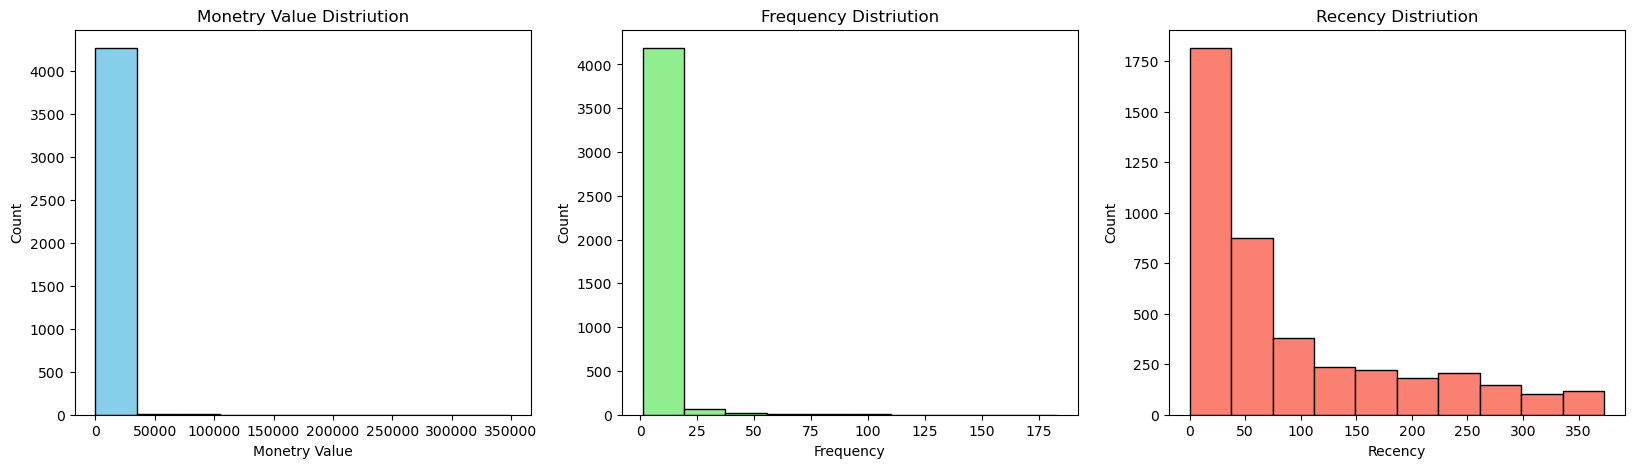

In [75]:
#checking for outliers because kmean clustering is affected by outliers 
#histogram
plt.figure(figsize=(20,5))
plt.subplot(1,3,1)
plt.hist(aggregated_df['MonetryValue'],bins=10,color='skyblue',edgecolor='black')
plt.xlabel('Monetry Value')
plt.ylabel('Count')
plt.title('Monetry Value Distriution')

plt.subplot(1,3,2)
plt.hist(aggregated_df['Frequency'],bins=10,color='lightgreen',edgecolor='black')
plt.xlabel('Frequency')
plt.ylabel('Count')
plt.title('Frequency Distriution')

plt.subplot(1,3,3)
plt.hist(aggregated_df['Recency'],bins=10,color='Salmon',edgecolor='black')
plt.xlabel('Recency')
plt.ylabel('Count')
plt.title('Recency Distriution')

plt.tight_layout()
plt.show()


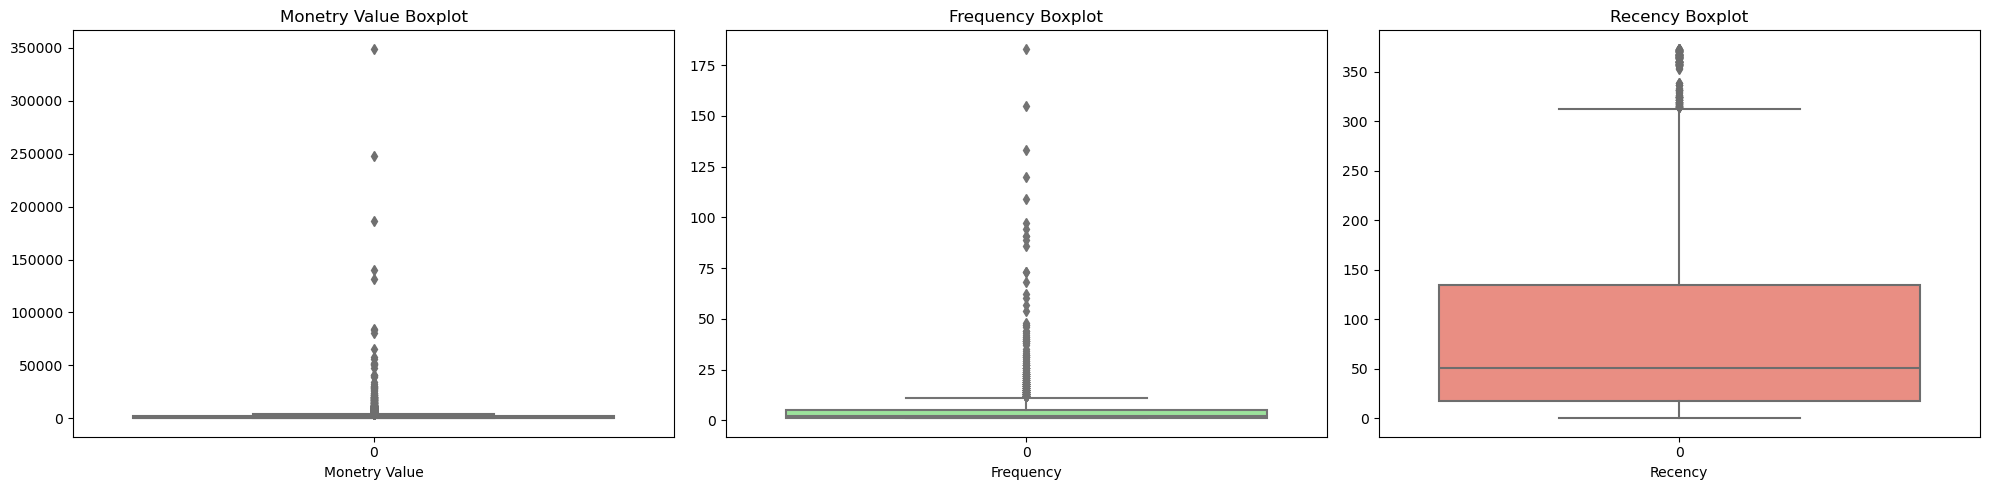

In [81]:
#boxplot to show outliers
plt.figure(figsize=(20,5))
plt.subplot(1,3,1)
sns.boxplot(data= aggregated_df['MonetryValue'],color='skyblue')
plt.xlabel('Monetry Value')
plt.title('Monetry Value Boxplot')

plt.subplot(1,3,2)
sns.boxplot(data= aggregated_df['Frequency'],color='lightgreen')
plt.xlabel('Frequency')
plt.title('Frequency Boxplot')

plt.subplot(1,3,3)
sns.boxplot(data= aggregated_df['Recency'],color='salmon')
plt.xlabel('Recency')
plt.title('Recency Boxplot')

plt.tight_layout()
plt.show()

In [85]:
#seperate outliers in seperated data to be analyzed seperately
#by using rule of IQR 
#Q1-k*(Q3-Q1) and Q3+k*(Q3-Q1), where Q1 and Q3 are the first and third quartiles, and k is a factor (typically 1.5).
M_Q1 = aggregated_df['MonetryValue'].quantile(0.25)
M_Q3=aggregated_df['MonetryValue'].quantile(0.75)
M_IQR= M_Q3-M_Q1
monetry_outliers_df = aggregated_df[(aggregated_df['MonetryValue']>(M_Q3+1.5*M_IQR))|(aggregated_df['MonetryValue']<(M_Q3-1.5*M_IQR))].copy()
monetry_outliers_df.describe()

,Customer ID,MonetryValue,Frequency,LastInvoiceDate,Recency
count,423.000000,423.000000,423.000000,423,423.000000
mean,15103.040189,12188.101740,17.167849,2010-11-09 12:26:02.978723328,30.035461
min,12357.000000,3802.040000,1.000000,2009-12-10 18:03:00,0.000000
25%,13622.000000,4605.940000,8.000000,2010-11-08 13:17:30,3.000000
50%,14961.000000,6191.320000,12.000000,2010-11-26 12:19:00,13.000000
75%,16692.000000,10273.235000,18.000000,2010-12-06 10:34:30,31.000000
max,18260.000000,349164.350000,183.000000,2010-12-09 19:32:00,364.000000
std,1728.661406,25830.851045,19.729755,NaN,51.541004


In [87]:
F_Q1 = aggregated_df['Frequency'].quantile(0.25)
F_Q3=aggregated_df['Frequency'].quantile(0.75)
F_IQR= F_Q3-F_Q1
frequency_outliers_df = aggregated_df[(aggregated_df['Frequency']>(F_Q3+1.5*F_IQR))|(aggregated_df['Frequency']<(F_Q3-1.5*F_IQR))].copy()
frequency_outliers_df.describe()

,Customer ID,MonetryValue,Frequency,LastInvoiceDate,Recency
count,279.000000,279.000000,279.000000,279,279.000000
mean,15352.655914,14409.714932,23.810036,2010-11-23 11:06:20.645161216,16.089606
min,12437.000000,1094.390000,12.000000,2010-05-12 16:51:00,0.000000
25%,13800.000000,4331.560500,13.000000,2010-11-20 13:14:30,2.000000
50%,15465.000000,6615.770000,17.000000,2010-12-02 10:46:00,7.000000
75%,16828.500000,11692.405000,23.000000,2010-12-07 11:08:30,19.000000
max,18260.000000,349164.350000,183.000000,2010-12-09 19:32:00,211.000000
std,1748.429987,31381.736785,21.932937,NaN,26.589117


In [93]:
#Recency doesn't have outliers so we don't do outliers_df to it
non_outliers_df= aggregated_df[(~aggregated_df.index.isin(monetry_outliers_df.index))&(~aggregated_df.index.isin(frequency_outliers_df.index))]
non_outliers_df



,Customer ID,MonetryValue,Frequency,LastInvoiceDate,Recency
0,12346.0,169.36,2,2010-06-28 13:53:00,164
1,12347.0,1323.32,2,2010-12-07 14:57:00,2
2,12348.0,221.16,1,2010-09-27 14:59:00,73
3,12349.0,2221.14,2,2010-10-28 08:23:00,42
4,12351.0,300.93,1,2010-11-29 15:23:00,10
...,...,...,...,...,...
4280,18283.0,641.77,6,2010-11-22 15:30:00,17
4281,18284.0,411.68,1,2010-10-04 11:33:00,66
4282,18285.0,377.00,1,2010-02-17 10:24:00,295
4283,18286.0,1246.43,2,2010-08-20 11:57:00,111


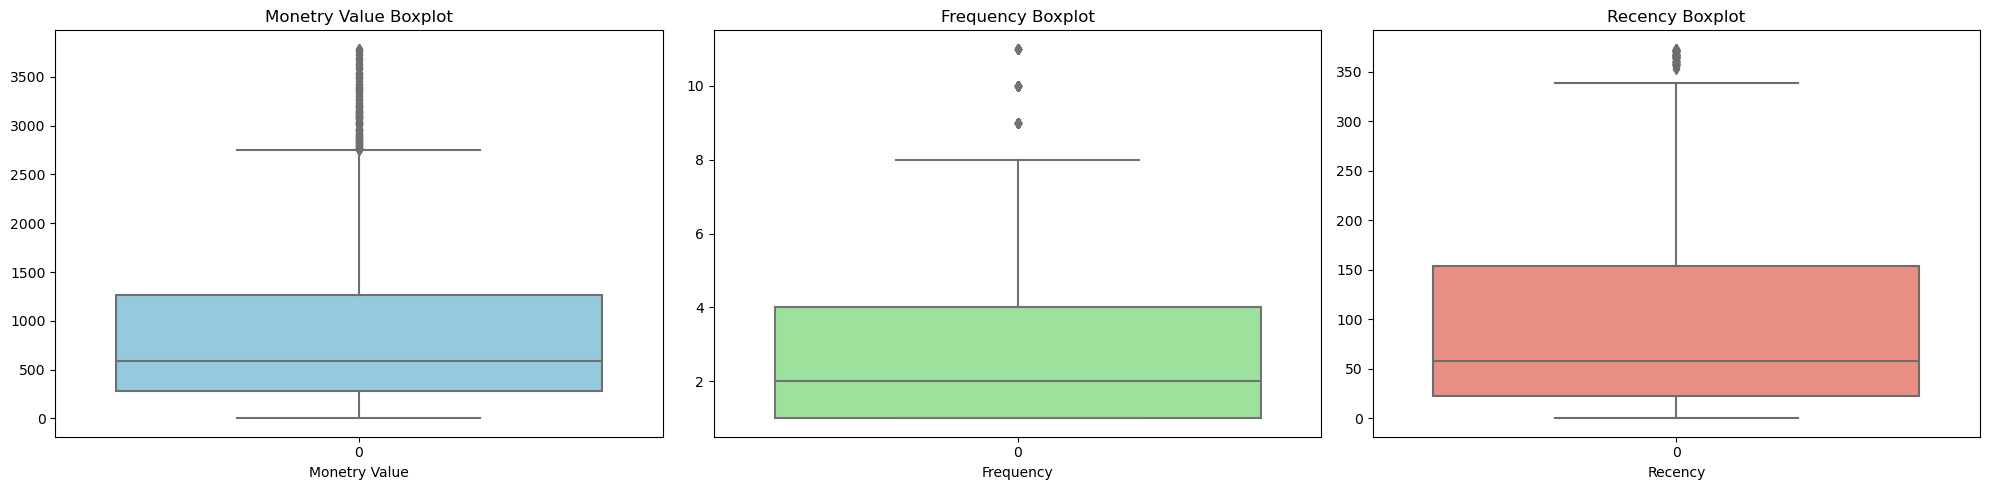

In [95]:
#check for outliers again 
plt.figure(figsize=(20,5))
plt.subplot(1,3,1)
sns.boxplot(data= non_outliers_df['MonetryValue'],color='skyblue')
plt.xlabel('Monetry Value')
plt.title('Monetry Value Boxplot')

plt.subplot(1,3,2)
sns.boxplot(data= non_outliers_df['Frequency'],color='lightgreen')
plt.xlabel('Frequency')
plt.title('Frequency Boxplot')

plt.subplot(1,3,3)
sns.boxplot(data= non_outliers_df['Recency'],color='salmon')
plt.xlabel('Recency')
plt.title('Recency Boxplot')

plt.tight_layout()
plt.show() #not removed at all but it's better anyway

Text(0.5, 0.92, '3D Scatter Plot of Customer Data')

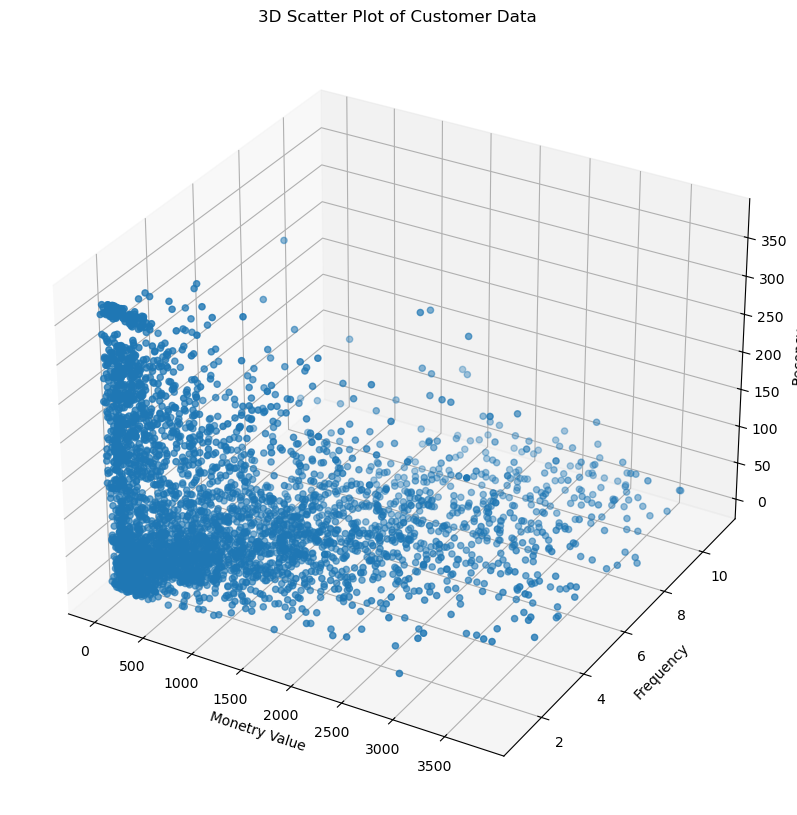

In [103]:
#3D 
fig = plt.figure(figsize=(10,20))
ax= fig.add_subplot(projection="3d")
scatter= ax.scatter(non_outliers_df['MonetryValue'],non_outliers_df['Frequency'],non_outliers_df['Recency'])
ax.set_xlabel('Monetry Value')
ax.set_ylabel('Frequency')
ax.set_zlabel('Recency')
ax.set_title('3D Scatter Plot of Customer Data') #noticing different scales and our algorithm k mean is sensitive to different scaling as centroids in our data will attach to Monetry Value as its on very high scaling

In [107]:
#standard scaling: (x-M)/z
scaler = StandardScaler()
scaled_data = scaler.fit_transform(non_outliers_df[['MonetryValue','Frequency','Recency']])
scaled_data

array([[-0.87594534, -0.38488934,  0.68214853],
       [ 0.5355144 , -0.38488934, -0.96925093],
       [-0.81258645, -0.83063076, -0.24548944],
       ...,
       [-0.62197163, -0.83063076,  2.01753946],
       [ 0.44146683, -0.38488934,  0.14187587],
       [ 1.72488781,  0.50659348, -0.81634357]])

In [109]:
scaled_data_df = pd.DataFrame(scaled_data, index = non_outliers_df.index, columns = ["MonetryValue","Frequency", "Recency"])
scaled_data_df.head(10)

,MonetryValue,Frequency,Recency
0,-0.875945,-0.384889,0.682149
1,0.535514,-0.384889,-0.969251
2,-0.812586,-0.830631,-0.245489
3,1.633678,-0.384889,-0.561498
4,-0.715016,-0.830631,-0.887700
5,-0.662580,-0.384889,-0.887700
6,-0.694431,-0.830631,-0.551304
7,-0.485946,-0.830631,1.069514
8,2.740758,0.060852,-0.836731
10,1.998016,0.060852,-0.887700


Text(0.5, 0.92, '3D Scatter Plot of Customer Data')

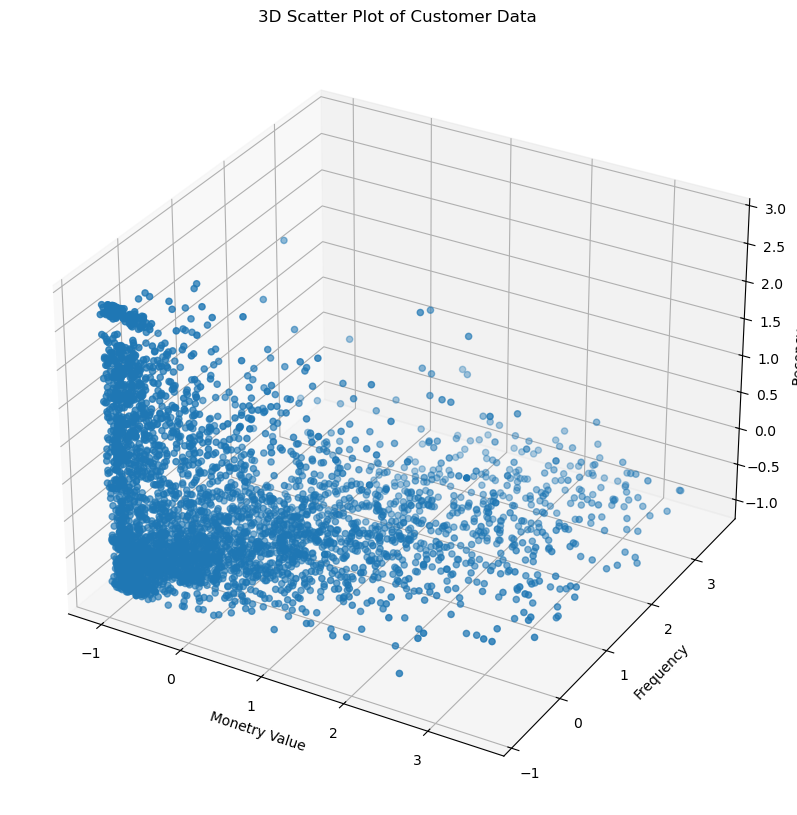

In [111]:
#3D again
fig = plt.figure(figsize=(10,20))
ax= fig.add_subplot(projection="3d")
scatter= ax.scatter(scaled_data_df['MonetryValue'],scaled_data_df['Frequency'],scaled_data_df['Recency'])
ax.set_xlabel('Monetry Value')
ax.set_ylabel('Frequency')
ax.set_zlabel('Recency')
ax.set_title('3D Scatter Plot of Customer Data') 

C:\Users\nermeen.ashraf\AppData\Local\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\nermeen.ashraf\AppData\Local\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\nermeen.ashraf\AppData\Local\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\nermeen.ashraf\AppData\Local\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to su

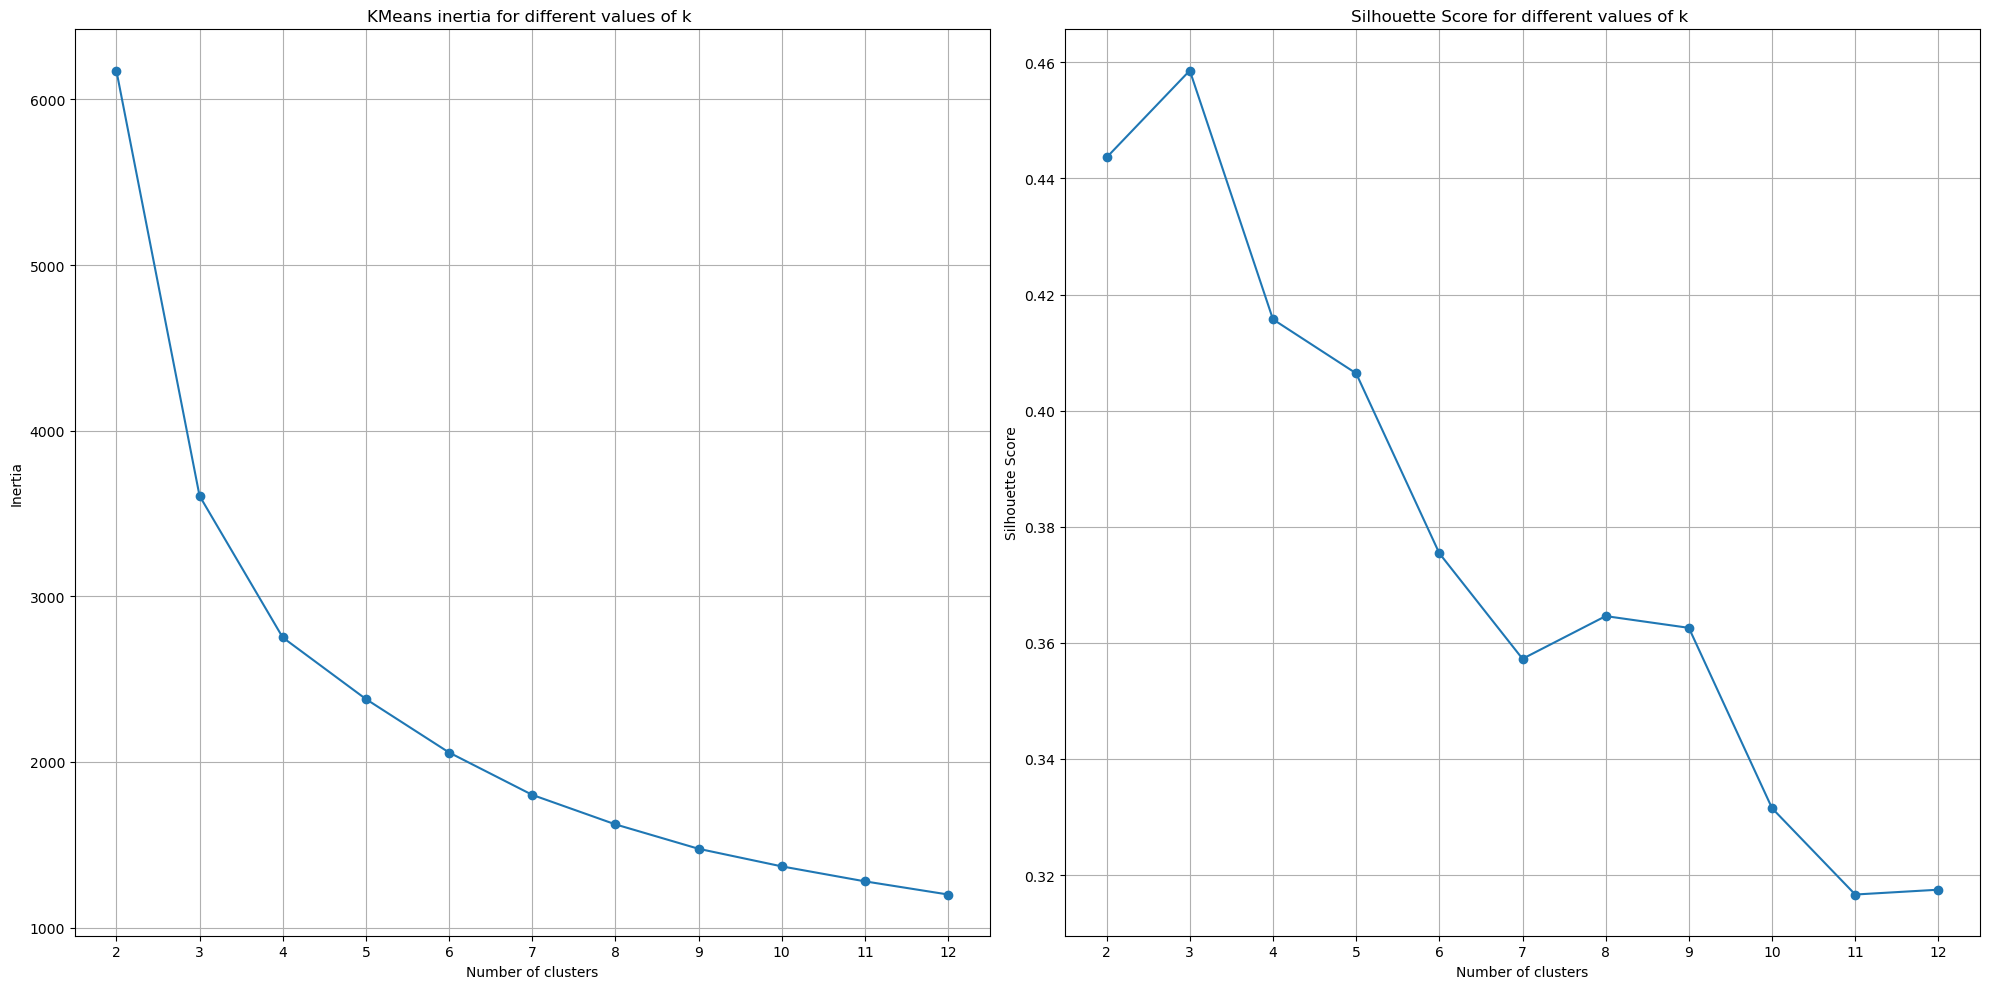

In [127]:
#Kmeans clustering 
#first determine K 
#method1: Elbow method which is agraph between k values and it's inertia resulting from k means clustering
#inertia is about average distance between points and it's centroid in every iteration of k values

max_k = 12
inertia =[] 
silhouette_Score=[]
k_values = range (2, max_k +1 )
for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state =42, max_iter=1000)
    cluster_labels= kmeans.fit_predict(scaled_data_df)
    sil_score = silhouette_score(scaled_data_df,cluster_labels)
    silhouette_Score.append(sil_score)
    inertia.append(kmeans.inertia_)
    
plt.figure(figsize=(20,10))

plt.subplot(1,2,1)
plt.plot(k_values,inertia,marker ='o')
plt.title('KMeans inertia for different values of k ')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.xticks(k_values)
plt.grid(True)


plt.subplot(1,2,2)
plt.plot(k_values,silhouette_Score,marker ='o')
plt.title('Silhouette Score for different values of k ')
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Score')
plt.xticks(k_values)
plt.grid(True)




plt.tight_layout()
plt.show()   #we are gonna choose k=4


In [129]:
#k Means clustering 
kmeans = KMeans(n_clusters=4, random_state = 42, max_iter=1000)
cluster_labels = kmeans.fit_predict(scaled_data_df)
cluster_labels


C:\Users\nermeen.ashraf\AppData\Local\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


array([0, 3, 2, ..., 0, 3, 3])

In [131]:
#add clustor column to our original data
non_outliers_df['cluster']= cluster_labels
non_outliers_df

C:\Users\nermeen.ashraf\AppData\Local\Temp\ipykernel_29248\1872658622.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  non_outliers_df['cluster']= cluster_labels


,Customer ID,MonetryValue,Frequency,LastInvoiceDate,Recency,cluster
0,12346.0,169.36,2,2010-06-28 13:53:00,164,0
1,12347.0,1323.32,2,2010-12-07 14:57:00,2,3
2,12348.0,221.16,1,2010-09-27 14:59:00,73,2
3,12349.0,2221.14,2,2010-10-28 08:23:00,42,3
4,12351.0,300.93,1,2010-11-29 15:23:00,10,2
...,...,...,...,...,...,...
4280,18283.0,641.77,6,2010-11-22 15:30:00,17,3
4281,18284.0,411.68,1,2010-10-04 11:33:00,66,2
4282,18285.0,377.00,1,2010-02-17 10:24:00,295,0
4283,18286.0,1246.43,2,2010-08-20 11:57:00,111,3


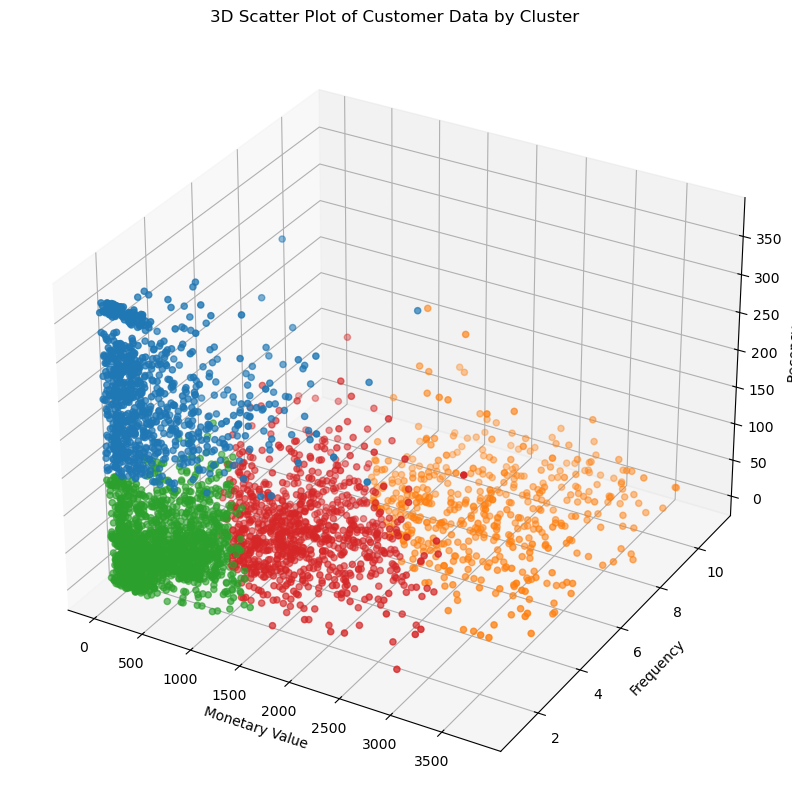

In [135]:
cluster_colors = {0: '#1f77b4',  # Blue
                  1: '#ff7f0e',  # Orange
                  2: '#2ca02c',  # Green
                  3: '#d62728'}  # Red

colors = non_outliers_df['cluster'].map(cluster_colors)

fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(projection='3d')

scatter = ax.scatter(non_outliers_df['MonetryValue'], 
                     non_outliers_df['Frequency'], 
                     non_outliers_df['Recency'], 
                     c=colors,  # Use mapped solid colors
                     marker='o')

ax.set_xlabel('Monetary Value')
ax.set_ylabel('Frequency')
ax.set_zlabel('Recency')

ax.set_title('3D Scatter Plot of Customer Data by Cluster')

plt.show()

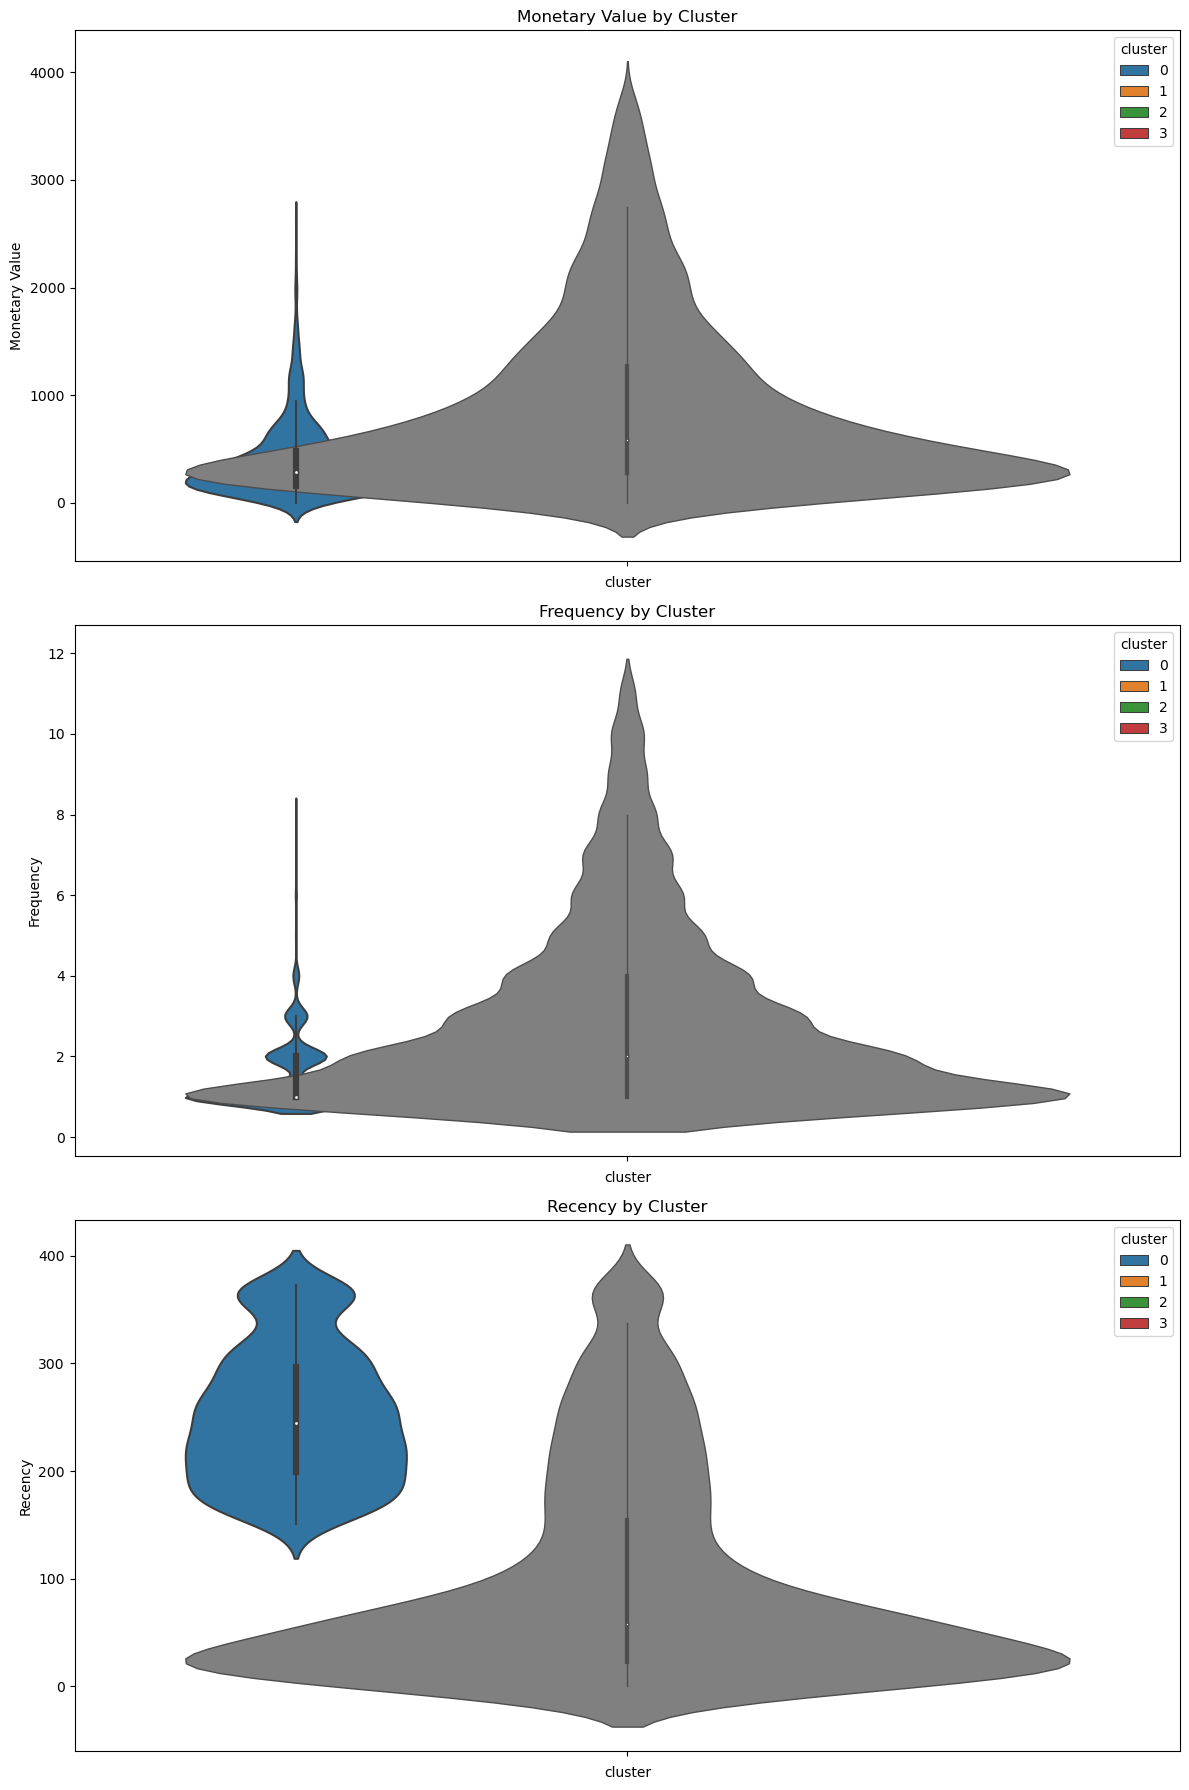

In [137]:
plt.figure(figsize=(12, 18))

plt.subplot(3, 1, 1)
sns.violinplot(x=non_outliers_df['cluster'], y=non_outliers_df['MonetryValue'], palette=cluster_colors, hue=non_outliers_df["cluster"])
sns.violinplot(y=non_outliers_df['MonetryValue'], color='gray', linewidth=1.0)
plt.title('Monetary Value by Cluster')
plt.ylabel('Monetary Value')

plt.subplot(3, 1, 2)
sns.violinplot(x=non_outliers_df['cluster'], y=non_outliers_df['Frequency'], palette=cluster_colors, hue=non_outliers_df["cluster"])
sns.violinplot(y=non_outliers_df['Frequency'], color='gray', linewidth=1.0)
plt.title('Frequency by Cluster')
plt.ylabel('Frequency')


plt.subplot(3, 1, 3)
sns.violinplot(x=non_outliers_df['cluster'], y=non_outliers_df['Recency'], palette=cluster_colors, hue=non_outliers_df["cluster"])
sns.violinplot(y=non_outliers_df['Recency'], color='gray', linewidth=1.0)
plt.title('Recency by Cluster')
plt.ylabel('Recency')

plt.tight_layout()
plt.show()